## Clustering Bag of words

In [1]:
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

In [2]:
# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('data/bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('data/courses_info.csv',index_col = 0)

In [4]:
# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

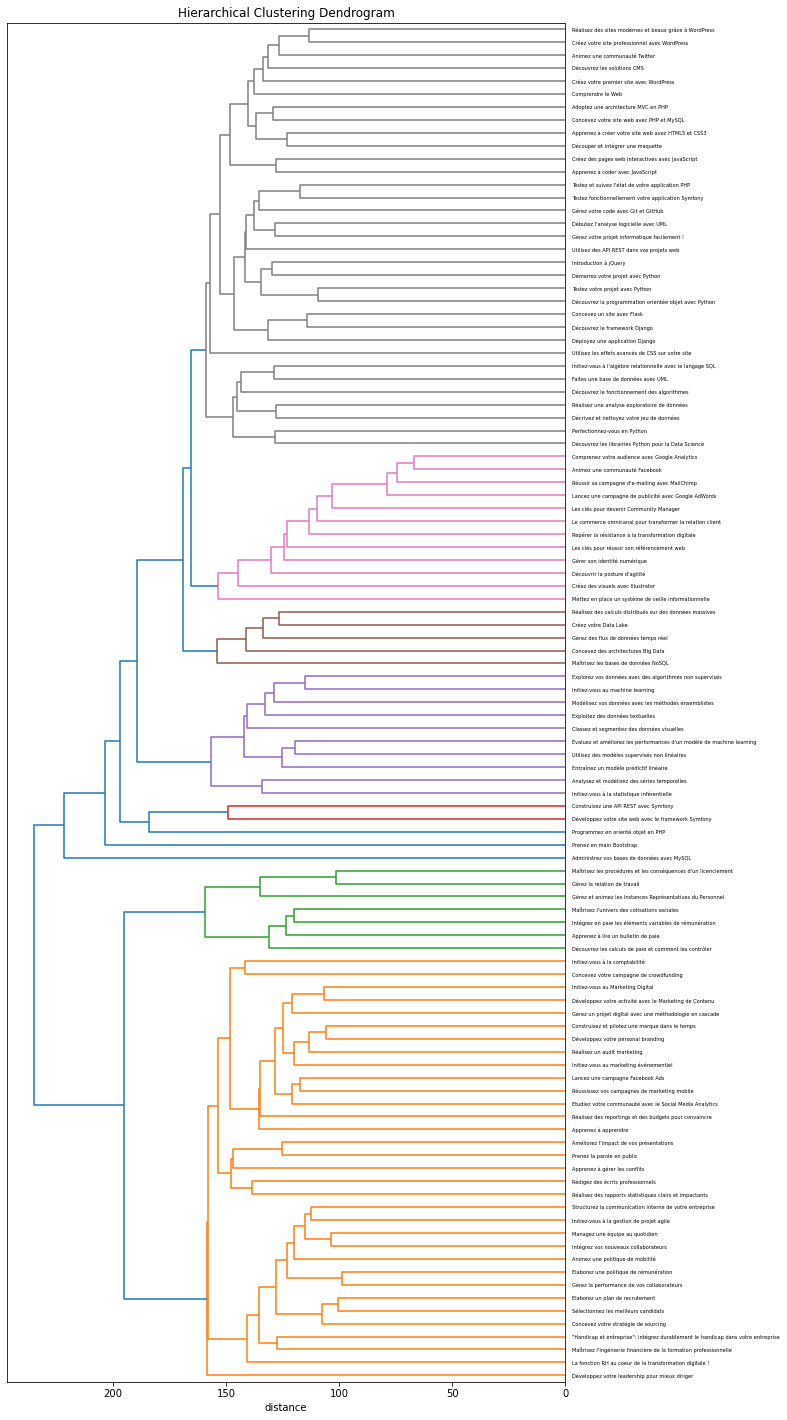

In [5]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [6]:
# Coupage du dendrogramme en 12 clusters
clusters = fcluster(Z, 12, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({"theme": theme, "cluster": clusters, "title": names})
print(courses.pivot_table(index="theme", columns="cluster", aggfunc=len, fill_value=0))

               title                                   
cluster           1  2  3  4  5   6  7  8  9   10 11 12
theme                                                  
RH                14  4  3  0  0   0  0  2  0   0  0  0
RH & marketing     6  0  0  0  0   0  0  3  0   1  0  0
data               1  0  0  0  0  10  5  0  4   0  0  0
dev                0  0  0  2  1   0  0  0  3  18  1  1
marketing         10  0  0  0  0   0  0  6  0   2  0  0
multi-parcours     2  0  0  0  0   0  0  1  0   5  0  0


## Clustering mistery

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 500

In [21]:
# import de l'échantillon
data = pd.read_csv('data/mystery.csv')

# préparation des données pour le clustering
X = data.values

# Centrer et réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [22]:
# Clustering par K-means
km = KMeans(n_clusters= n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

<ipython-input-23-6bfe2181dd5c>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)


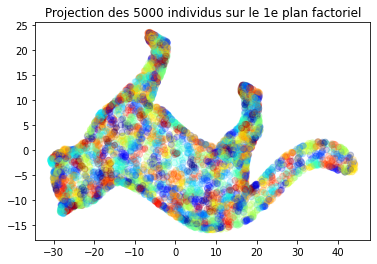

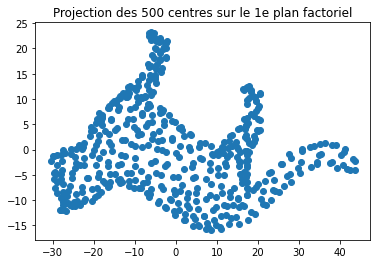

In [23]:
# Affichage du clustering par projection des individus sur le prmeier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()